# 门（Gate）和操作（Operation）

In [2]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

门 (Gate) 是可以应用于一组量子比特（具有Qid的对象）的效果。门可以通过调用它们的`on`方法应用于量子比特，或者直接将门应用于量子比特。通过这些调用创建的对象是一个操作 (Operation)。或者，可以将门视为一个工厂，给定输入的量子比特，生成一个关联的GateOperation对象。

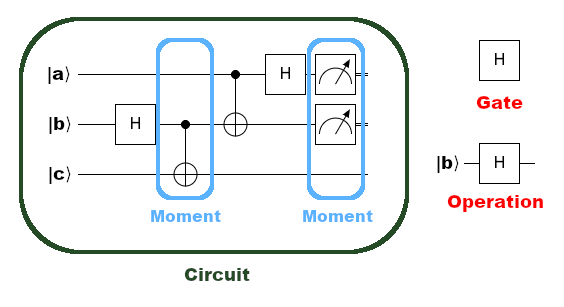
*图1：门和操作比较, 引用自：https://quantumai.google/cirq/build/gates*

上面的示例展示了许多量子计算教科书中量子隐形传态电路的前半部分。这个示例使用了三种不同的门：Hadamard门 (H)、受控非门 (CNOT) 和测量门。这些分别由`cirq.H`、`cirq.CNOT`和`cirq.measure`表示。

在这个示例中，Hadamard门是一个可以在许多不同情况下应用于许多不同量子比特的门对象。注意，上面的示例中有两个H门实例，但应用于不同的量子比特。这是一个门类型具有两个操作实例的示例，一个应用于量子比特'|b⟩'，另一个应用于量子比特'|a⟩'。

门通常可以应用于任何类型的量子比特（`NamedQubit`、`LineQubit`、`GridQubit`等 - 详见量子比特部分）以创建操作。

以下示例展示了如何构建这些门和操作。

In [3]:
# 这个示例使用命名量子比特以保持抽象
# 然而，我们也可以使用LineQubits或GridQubits来指定几何结构
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
c = cirq.NamedQubit('c')

# 示例操作，对应于上面的Moments
print(cirq.H(b))
print(cirq.CNOT(b, c))
print(cirq.CNOT(a, b))
print(cirq.H(a))
print(cirq.measure(a, b))

H(b)
CNOT(b, c)
CNOT(a, b)
H(a)
cirq.MeasurementGate(2, cirq.MeasurementKey(name='a,b'), ())(a, b)


## 门和操作的不可变性
在Cirq中，门和操作被认为是不可变对象。这意味着`cirq.Gate`或`cirq.Operation`在创建后不应被修改。如果需要修改这些对象的属性，应创建一个新对象。

就地修改这些对象可能会导致意外行为。例如，改变现有`cirq.Operation`对象的量子比特可能会导致包含该对象的现有`cirq.Moment`中的操作具有重叠的量子比特。


## 门的其他特性
大多数门操作于特定数量的量子比特，可以通过`num_qubits()`函数访问。一个例外是`MeasurementGate`，它可以应用于可变数量的量子比特。

大多数门有一个酉矩阵(unitary matrix)表示，可以通过`cirq.unitary(gate)`访问。

并非所有门都对应于酉演化。它们可能表示酉矩阵的概率混合或一般的量子通道。混合的组成酉矩阵和相关概率可以通过`cirq.mixture(gate)`访问。通道的Kraus算符表示可以通过`cirq.kraus(gate)`访问。非酉门通常用于噪声模拟。有关更多详细信息，请参阅噪声文档。

许多算术运算符在应用于门时会按预期方式工作。例如，`cirq.X**0.5`表示X门的平方根。这些也可以应用于操作符以获得更紧凑的表示，例如`cirq.X(q1)**0.5`将是应用于量子比特q1的X门的平方根。这种功能取决于门定义的“魔法方法”（详见下文）。

门可以通过使用`Gate.controlled()`转换为受控版本。通常，这返回一个`ControlledGate`实例。然而，对于某些特殊情况，门的受控版本也是已知的门，这将返回该门的实例。例如，`cirq.X.controlled()`返回一个`cirq.CNOT`门。操作也有类似的功能`Operation.controlled_by()`，例如`cirq.X(q0).controlled_by(q1)`。


## 常见的门
Cirq支持许多门，并可以扩展这些门以用于更高级的用例。

### 测量门
`cirq.MeasurementGate` 这是在计算基中的测量。这个门可以应用于可变数量的量子比特。函数`cirq.measure(q0, q1, ...)`也可以用作创建MeasurementGate的简写。

### 单量子比特门
大多数单量子比特门可以被认为是在Bloch球表示中的绕轴旋转，通常以其旋转轴命名。一些操作符使用“半转”的表示法，定义为绕轴旋转180度（$\pi$弧度）。

- **cirq.X / cirq.Y / cirq.Z** Pauli门X、Y和Z，它们绕关联轴旋转半转。
- **cirq.rx(rads)** 绕Pauli 'X'轴的弧度旋转。这相当于`exp(-i X rads / 2) = cos(rads/2) I - i sin(rads/2) X`
- **cirq.ry(rads)** 绕Pauli 'Y'轴的弧度旋转。这相当于`exp(-i Y rads / 2) = cos(rads/2) I - i sin(rads/2) Y`
- **cirq.rz(rads)** 绕Pauli 'Z'轴的弧度旋转。这相当于`exp(-i Z rads / 2) = cos(rads/2) I - i sin(rads/2) Z`

- **cirq.XPowGate(exponent=t)** 绕Pauli X轴的旋转，相当于`cirq.X**t`。参见`cirq.XPowGate`的酉矩阵。注意，这相对于传统定义的旋转矩阵具有一个全局相位`e^{i·π·t/2}`，可以通过可选参数`global_shift`进行修改。
- **cirq.YPowGate(exponent=t)** 绕Pauli Y轴的旋转，相当于`cirq.Y**t`。参见`cirq.YPowGate`的酉矩阵。注意，这相对于传统定义的旋转矩阵具有一个全局相位`e^{i·π·t/2}`，可以通过可选参数`global_shift`进行修改。
- **cirq.ZPowGate(exponent=t)** 绕Pauli Z轴的旋转，相当于`cirq.Z**t`。参见`cirq.ZPowGate`的酉矩阵。注意，这相对于传统定义的旋转矩阵具有一个全局相位`e^{i·π·t/2}`，可以通过可选参数`global_shift`进行修改。  

- **cirq.PhasedXPowGate** 这个门是在Bloch球的XY平面上绕轴旋转。`PhasedXPowGate`接受两个参数，`exponent`和`phase_exponent`。这个门等价于电路`───Z^-p───X^t───Z^p───`，其中p是`phase_exponent`，t是`exponent`。
- **cirq.PhasedXZGate** 这个门类似于上面的`cirq.PhasedXPowGate`，但它还包括绕Z轴的额外相位。`PhasedXZGate`接受三个参数，`x_exponent`、`z_exponent`和`axis_phase_exponent`。这个门等价于电路`───Z^(-a)──X^x──Z^a────Z^z───`，其中x是`x_exponent`，z是`z_exponent`，a是`axis_phase_exponent`。
- **cirq.H / cirq.HPowGate** Hadamard门是绕X+Z轴的旋转。`cirq.HPowGate(exponent=t)`是绕该轴的t转变量旋转。`cirq.H`是π旋转，相当于`cirq.HPowGate(exponent=1)`。
- **S** Z门的平方根，相当于`cirq.Z**0.5`。
- **T** Z门的四次根，相当于`cirq.Z**0.25`。

### 双量子比特门
- **cirq.CZ / cirq.CZPowGate** 受控-Z门。一个双量子比特门，对|11⟩状态进行相位调整。`cirq.CZPowGate(exponent=t)`相当于`cirq.CZ**t`，其矩阵表示为`exp(i π |11⟩⟨11| t)`。
- **cirq.CNOT / cirq.CNotPowGate** 受控-X门。这个门交换|11⟩和|10⟩状态。`cirq.CNotPowGate(exponent=t)`相当于`cirq.CNOT**t`。
- **cirq.SWAP / cirq.SwapPowGate** 交换门交换|01⟩和|10⟩状态。`cirq.SWAP**t`与`cirq.SwapPowGate(exponent=t)`相同。
- **cirq.ISWAP / cirq.ISwapPowGate** iSwap门交换|01⟩和|10⟩状态，并添加一个相对相位i。`cirq.ISWAP**t`与`cirq.ISwapPowGate(exponent=t)`相同。
- **Parity gates**: 门`cirq.XX`、`cirq.YY`和`cirq.ZZ`相当于在两个量子比特上执行等效的单量子比特Pauli门。门`cirq.XXPowGate`、`cirq.YYPowGate`和`cirq.ZZPowGate`是这些门的幂。

### 其他门
- **cirq.MatrixGate**: 由其酉矩阵（以numpy ndarray形式）定义的门。
- **cirq.WaitGate**: 这个门在指定的`cirq.Duration`时间内不做任何事情。这对于进行T1和T2衰减实验非常有用。
- **cirq.CCNOT, cirq.CCX, cirq.TOFFOLI, cirq.CCXPowGate**: 三量子比特门，表示受控-受控-X门及其幂。
- **cirq.CCZ, cirq.CCZPowGate**: 三量子比特门，表示受控-受控-Z门及其幂。
- **CSWAP, CSwapGate, FREDKIN**: 三量子比特门，表示受控-SWAP门。
- **TwoQubitDiagonalGate, ThreeQubitDiagonalGate**: 在计算基中对角的两量子比特和三量子比特门。
- **QubitPermutationGate**: 置换给定量子比特集合的门。

